In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import statistics as st

from scipy.spatial import distance
from math import sin, cos, sqrt, atan2, radians
import time

#import shapely
from shapely.geometry import shape, Point, box
import shapely.wkt

import six

import random

In [398]:
permits = pd.read_csv('data/perms_w_features_for_eda.csv')

In [399]:
permits.head()

,borough,bin_no,house_no,street_name,job_no,zip_code,job_start_date,owners_business_type,non-profit,latitude,longitude,point,in_nyc,in_borough,bct2020,total_complaints,closest_subway,closest_subway_line,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,hist_dist_name,in_hist_dist,closest_park,name_closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
0,MANHATTAN,1056547,2686,BROADWAY,121207354,10025,2022-05-11,PARTNERSHIP,N,40.798817,-73.968740,POINT (-73.96874 40.798817),1.0,MANHATTAN,1019100,2255,0.033418,1,5,15,42,195,none,0,0.000000,Broadway Malls,2,17,33,214,9005,0.963,0.037,0.0,1.89,0.129,0.159,0.614,0.081,0.099,0.008,0.040,4951,0.924,0.076
1,MANHATTAN,1812187,140,HILLSIDE AVENUE,121189524,10040,2022-05-11,CORPORATION,N,40.860296,-73.926125,POINT (-73.926125 40.860296),1.0,MANHATTAN,1028300,701,0.085621,1,2,15,34,153,none,0,0.049425,Highbridge Park,1,10,42,280,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
2,MANHATTAN,1091669,37,HILLSIDE AVENUE,121205445,10040,2021-02-19,PARTNERSHIP,N,40.858508,-73.929532,POINT (-73.929532 40.858508),1.0,MANHATTAN,1028300,546,0.177308,A,0,6,35,146,none,0,0.115871,Fort Tryon Park,0,11,41,275,7740,0.998,0.002,0.0,2.30,0.153,0.673,0.189,0.066,0.041,0.009,0.022,3517,0.957,0.043
3,BRONX,2823631,368,EAST 152 STREET,220586168,10455,2022-05-11,INDIVIDUAL,N,40.818565,-73.918118,POINT (-73.918118 40.818565),1.0,BRONX,2006700,1578,0.167270,2-5,0,9,60,215,none,0,0.086285,Melrose Playground,1,32,93,418,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030
4,BRONX,2129278,418,EAST 153 STREET,220593463,10455,2018-02-09,CORPORATION,N,40.818742,-73.915997,POINT (-73.915997 40.818742),1.0,BRONX,2006700,2368,0.196656,2-5,0,12,61,216,none,0,0.134117,P.S. 29 Ballfield,0,32,90,422,6893,0.979,0.021,0.0,2.85,0.264,0.710,0.017,0.245,0.008,0.010,0.011,2439,0.970,0.030


In [400]:
permits.shape

(7177, 45)

In [401]:
permits.columns

Index(['borough', 'bin_no', 'house_no', 'street_name', 'job_no', 'zip_code',
       'job_start_date', 'owners_business_type', 'non-profit', 'latitude',
       'longitude', 'point', 'in_nyc', 'in_borough', 'bct2020',
       'total_complaints', 'closest_subway', 'closest_subway_line',
       'subway_count_tenth_mi', 'subway_count_half_mi', 'subway_count_one_mi',
       'subway_count_two_five_mi', 'hist_dist_name', 'in_hist_dist',
       'closest_park', 'name_closest_park', 'park_count_tenth_mi',
       'park_count_half_mi', 'park_count_one_mi', 'park_count_two_five_mi',
       'pop_20', 'hhpop_20p', 'gq_20p', 'instgq_20p', 'avhhsz_20',
       'popu18_20p', 'hsp_20p', 'wnh_20p', 'bnh_20p', 'anh_20p', 'onh_20p',
       'nh2pl_20p', 'hunits_20', 'ochu_20p', 'vachu_20p'],
      dtype='object')

In [402]:
permits.drop(columns = ['in_borough', 'in_nyc'], inplace = True)

In [403]:
permits.shape

(7177, 43)

In [404]:
permits.dtypes

borough                      object
bin_no                        int64
house_no                     object
street_name                  object
job_no                        int64
zip_code                      int64
job_start_date               object
owners_business_type         object
non-profit                   object
latitude                    float64
longitude                   float64
point                        object
bct2020                       int64
total_complaints              int64
closest_subway              float64
closest_subway_line          object
subway_count_tenth_mi         int64
subway_count_half_mi          int64
subway_count_one_mi           int64
subway_count_two_five_mi      int64
hist_dist_name               object
in_hist_dist                  int64
closest_park                float64
name_closest_park            object
park_count_tenth_mi           int64
park_count_half_mi            int64
park_count_one_mi             int64
park_count_two_five_mi      

In [405]:
pd.set_option('display.max_columns', None)

In [406]:
permits.describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,7.177000e+03,7.177000e+03,7177.000000,7177.000000,7177.000000,7.177000e+03,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000,7177.000000
mean,3.935469e+06,3.855671e+08,10923.168455,40.674872,-73.960083,3.680677e+06,349.701129,0.852570,0.223074,5.225303,18.084018,94.559565,0.005852,0.152357,0.724119,9.782500,30.866518,145.793368,4408.716734,0.980759,0.019242,0.005121,2.772844,0.206467,0.240463,0.390556,0.182185,0.141460,0.014372,0.030942,1738.906089,0.930128,0.069872
std,1.124590e+06,1.100074e+08,1167.560297,0.094704,0.129389,1.092574e+06,442.656956,1.033604,0.914538,8.197947,23.615700,104.669143,0.076280,0.199300,1.089741,9.209166,27.723839,115.417194,1687.414259,0.039864,0.039864,0.020297,0.473152,0.062246,0.190783,0.306871,0.238657,0.166746,0.019354,0.018732,795.938772,0.045250,0.045250
min,1.002657e+06,1.101465e+08,10001.000000,40.499212,-74.254845,1.000600e+06,0.000000,0.004600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,44.000000,0.301000,0.000000,0.000000,1.480000,0.038000,0.012000,0.003000,0.000000,0.001000,0.000000,0.003000,7.000000,0.676000,0.000000
25%,3.326359e+06,3.211949e+08,10312.000000,40.598427,-74.071815,3.036502e+06,64.000000,0.196112,0.000000,0.000000,0.000000,15.000000,0.000000,0.056600,0.000000,4.000000,12.000000,49.000000,3134.000000,0.980000,0.000000,0.000000,2.500000,0.172000,0.109000,0.074000,0.013000,0.035000,0.006000,0.017000,1153.000000,0.923000,0.049000
50%,4.163375e+06,4.210740e+08,11210.000000,40.673299,-73.939770,4.025402e+06,182.000000,0.412733,0.000000,2.000000,10.000000,63.000000,0.000000,0.108817,0.000000,6.000000,19.000000,95.000000,4357.000000,0.996000,0.004000,0.000000,2.770000,0.201000,0.166000,0.352000,0.042000,0.077000,0.010000,0.024000,1666.000000,0.941000,0.059000
75%,5.054101e+06,5.201383e+08,11355.000000,40.745155,-73.868732,5.002002e+06,472.000000,1.009359,0.000000,8.000000,29.000000,154.000000,0.000000,0.183377,1.000000,12.000000,39.000000,235.000000,5597.000000,1.000000,0.020000,0.000000,3.020000,0.233000,0.311000,0.671000,0.304000,0.190000,0.015000,0.042000,2192.000000,0.951000,0.077000
max,5.863658e+06,5.401977e+08,99999.000000,40.909605,-73.700772,5.032300e+06,4942.000000,5.331561,16.000000,96.000000,217.000000,556.000000,1.000000,1.517895,13.000000,65.000000,132.000000,422.000000,13385.000000,1.000000,0.699000,0.299000,5.120000,0.566000,0.912000,0.945000,0.891000,0.874000,0.287000,0.144000,8067.000000,1.000000,0.324000


[This site](https://datagy.io/seaborn-boxplot/) gave me the idea to set_style and set_palette and suggested this style/palette combination.

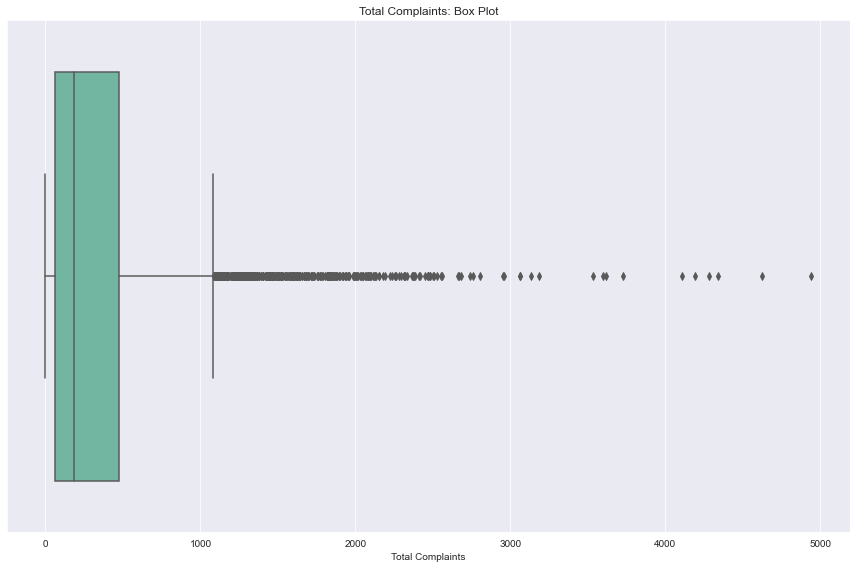

In [407]:
plt.figure(figsize = (12, 8))

sns.set_style('darkgrid')
sns.set_palette('Set2')

sns.boxplot(x = permits['total_complaints'])

plt.title('Total Complaints: Box Plot')
plt.xlabel('Total Complaints')

plt.tight_layout()
plt.savefig('images/total_complaints_boxplot.png');

In [408]:
q1 = np.percentile(permits['total_complaints'], 25)
median = np.percentile(permits['total_complaints'], 50)
q3 = np.percentile(permits['total_complaints'], 75)
iqr = q3-q1
max_ = q3+1.5*iqr
if q1-1.5*iqr >= 0:
    min_ = q1-1.5*iqr
else:
    min_ = 0
outliers_high = len(permits[permits['total_complaints']>max_])
outliers_low = len(permits[permits['total_complaints']<min_])

print("Total Complaints Median:", median)
print("Total Complaints First Quartile:", q1)
print("Total Complaints Third Quartile:", q3)
print("Total Complaints Interquartile Range:", iqr)
print("Total Complaints 'Maximum':", max_)
print("Total Complaints 'Minimum':", min_)
print("")
print(f"In Total Complaints, there are {outliers_high} outliers above the maximum. That is {round((outliers_high/permits.shape[0])*100, 2)}% of the data")
print(f"In Total Complaintes, there are {outliers_low} outliers below the minimum. That is {round((outliers_low/permits.shape[0])*100, 2)}% of the data")

Total Complaints Median: 182.0
Total Complaints First Quartile: 64.0
Total Complaints Third Quartile: 472.0
Total Complaints Interquartile Range: 408.0
Total Complaints 'Maximum': 1084.0
Total Complaints 'Minimum': 0

In Total Complaints, there are 468 outliers above the maximum. That is 6.52% of the data
In Total Complaintes, there are 0 outliers below the minimum. That is 0.0% of the data


In [409]:
permits[permits['total_complaints']>max_].describe()

,bin_no,job_no,zip_code,latitude,longitude,bct2020,total_complaints,closest_subway,subway_count_tenth_mi,subway_count_half_mi,subway_count_one_mi,subway_count_two_five_mi,in_hist_dist,closest_park,park_count_tenth_mi,park_count_half_mi,park_count_one_mi,park_count_two_five_mi,pop_20,hhpop_20p,gq_20p,instgq_20p,avhhsz_20,popu18_20p,hsp_20p,wnh_20p,bnh_20p,anh_20p,onh_20p,nh2pl_20p,hunits_20,ochu_20p,vachu_20p
count,4.680000e+02,4.680000e+02,468.000000,468.000000,468.000000,4.680000e+02,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,2.392268e+06,2.385163e+08,10599.290598,40.756304,-73.935578,2.205406e+06,1620.350427,0.198441,1.047009,15.023504,47.946581,223.032051,0.017094,0.083284,1.472222,22.709402,72.829060,290.905983,5146.311966,0.964310,0.035690,0.003442,2.487115,0.199699,0.372767,0.207694,0.284838,0.090955,0.011600,0.032205,2251.961538,0.933058,0.066942
std,1.143107e+06,1.020213e+08,518.940401,0.080529,0.054321,1.033125e+06,562.926657,0.168880,1.946262,15.015249,37.929656,128.245970,0.129761,0.065307,1.598071,12.535387,32.323125,92.955239,2097.676288,0.048566,0.048566,0.014750,0.446755,0.070398,0.240761,0.233695,0.211246,0.132781,0.005109,0.016602,1196.140264,0.035127,0.035127
min,1.002657e+06,1.101465e+08,10001.000000,40.512208,-74.249418,1.000600e+06,1087.000000,0.004600,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,5.000000,13.000000,1093.000000,0.501000,0.000000,0.000000,1.480000,0.038000,0.044000,0.007000,0.007000,0.001000,0.003000,0.005000,360.000000,0.747000,0.009000
25%,1.091602e+06,1.227361e+08,10031.000000,40.689659,-73.956883,1.022200e+06,1233.000000,0.081142,0.000000,7.000000,28.000000,152.750000,0.000000,0.037774,0.000000,13.000000,51.750000,257.000000,3570.000000,0.947000,0.005000,0.000000,2.180000,0.149750,0.142500,0.022000,0.088000,0.014000,0.009000,0.017000,1488.000000,0.914000,0.040000
50%,2.129269e+06,2.205797e+08,10457.000000,40.769019,-73.935479,2.023200e+06,1466.000000,0.149272,0.000000,12.000000,38.000000,200.000000,0.000000,0.068202,1.000000,23.000000,78.000000,314.500000,4826.500000,0.980000,0.020000,0.000000,2.530000,0.204000,0.320500,0.105000,0.263000,0.045000,0.011000,0.032000,1948.000000,0.939000,0.061000
75%,3.421365e+06,3.212672e+08,11213.000000,40.824338,-73.906065,3.035475e+06,1832.250000,0.249347,2.000000,17.000000,53.000000,237.000000,0.000000,0.109028,2.000000,31.000000,97.250000,349.000000,6378.500000,0.995000,0.053000,0.000000,2.800000,0.259000,0.618000,0.292250,0.440000,0.100000,0.013000,0.044000,2594.000000,0.960000,0.086000
max,5.174556e+06,5.203858e+08,11693.000000,40.884601,-73.749014,5.024800e+06,4942.000000,1.067705,12.000000,96.000000,210.000000,551.000000,1.000000,0.321175,13.000000,64.000000,132.000000,422.000000,13385.000000,1.000000,0.499000,0.178000,4.760000,0.518000,0.893000,0.868000,0.787000,0.874000,0.065000,0.080000,8067.000000,0.991000,0.253000


In [410]:
permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True)

BRONX            0.318376
MANHATTAN        0.309829
BROOKLYN         0.277778
QUEENS           0.072650
STATEN ISLAND    0.021368
Name: borough, dtype: float64

[This site](https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value-counts) reminded me how to extract the keys and values from `value_counts`

In [411]:
values = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).to_list()
keys = permits[permits['total_complaints']>max_]['borough'].value_counts(normalize = True).keys().to_list()

In [412]:
hi_complaints_boro = dict(zip(keys, values))

In [413]:
hi_complaints_boro

{'BRONX': 0.31837606837606836,
 'MANHATTAN': 0.30982905982905984,
 'BROOKLYN': 0.2777777777777778,
 'QUEENS': 0.07264957264957266,
 'STATEN ISLAND': 0.021367521367521368}

In [414]:
permits['borough'].value_counts(normalize = True)

BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64

In [415]:
values = permits['borough'].value_counts(normalize = True).to_list()
keys = permits['borough'].value_counts(normalize = True).keys().to_list()
complaints_boro = dict(zip(keys, values))

In [416]:
complaints_boro

{'BROOKLYN': 0.30597742789466353,
 'QUEENS': 0.2889786819005155,
 'STATEN ISLAND': 0.26417723282708655,
 'BRONX': 0.10185314198132925,
 'MANHATTAN': 0.039013515396405185}

In [204]:
boroughs = pd.DataFrame(permits['borough'].value_counts(normalize = True))

In [205]:
boroughs

,borough
BROOKLYN,0.305977
QUEENS,0.288979
STATEN ISLAND,0.264177
BRONX,0.101853
MANHATTAN,0.039014


In [206]:
boroughs.rename(columns = {'borough': 'percent_of_tot'}, inplace = True)

In [207]:
boroughs.shape

(5, 1)

In [208]:
for i in boroughs.index:
    boroughs.loc[i, 'high_complaints_percent'] = hi_complaints_boro[i]

boroughs

,percent_of_tot,high_complaints_percent
BROOKLYN,0.305977,0.277778
QUEENS,0.288979,0.072650
STATEN ISLAND,0.264177,0.021368
BRONX,0.101853,0.318376
MANHATTAN,0.039014,0.309829


In [210]:
boroughs['complaints_percent_diff'] = (boroughs['high_complaints_percent']-boroughs['percent_of_tot'])/(boroughs['percent_of_tot'])

In [211]:
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff
BROOKLYN,0.305977,0.277778,-0.092163
QUEENS,0.288979,0.072650,-0.748599
STATEN ISLAND,0.264177,0.021368,-0.919117
BRONX,0.101853,0.318376,2.125835
MANHATTAN,0.039014,0.309829,6.941583


In [212]:
high_complaints = permits[permits['total_complaints']>max_]

In [213]:
high_complaints.shape

(468, 43)

In [214]:
high_complaints['closest_park'].mean()

0.0832837533567232

In [215]:
permits['closest_park'].mean()

0.1523573087510188

**The mean closest park for high complaint permit sites is about 50% closer than the mean closest park for the whole dataset.**

In [216]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

In [217]:
keys = permits.groupby('borough')['closest_park'].mean().keys().to_list()
values = permits.groupby('borough')['closest_park'].mean().to_list()

parks_borough = dict(zip(keys, values))
parks_borough

{'BRONX': 0.10213015626656506,
 'BROOKLYN': 0.1156631915352072,
 'MANHATTAN': 0.07685265069163472,
 'QUEENS': 0.2169103592494226,
 'STATEN ISLAND': 0.15475952784120584}

In [218]:
for i in boroughs.index:
    boroughs.loc[i, 'closest_park_mean'] = parks_borough[i]
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean
BROOKLYN,0.305977,0.277778,-0.092163,0.115663
QUEENS,0.288979,0.072650,-0.748599,0.216910
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760
BRONX,0.101853,0.318376,2.125835,0.102130
MANHATTAN,0.039014,0.309829,6.941583,0.076853


In [219]:
keys = high_complaints.groupby('borough')['closest_park'].mean().keys().to_list()
values = high_complaints.groupby('borough')['closest_park'].mean().to_list()

parks_high_compl = dict(zip(keys, values))
parks_high_compl

{'BRONX': 0.06798596357955006,
 'BROOKLYN': 0.09659551687423658,
 'MANHATTAN': 0.06822820301705507,
 'QUEENS': 0.12885921691272517,
 'STATEN ISLAND': 0.20151679914371518}

# Exploring Parks in NYC

In [102]:
borough_bounds = pd.read_csv('../capstone_large_data_sets/nybb.csv')
borough_bounds.head()

,the_geom,BoroCode,BoroName,Shape_Leng,Shape_Area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,Queens,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,Brooklyn,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,Staten Island,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,Manhattan,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,Bronx,463868.599917,1.187194e+09


In [103]:
borough_bounds.columns = borough_bounds.columns.str.lower()

In [105]:
borough_bounds['boroname'] = borough_bounds['boroname'].str.upper()

In [106]:
borough_bounds

,the_geom,borocode,boroname,shape_leng,shape_area
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09


In [91]:
def shape_list(multipolygons):
    shape_list = []
    for i in range(0, len(multipolygons)):
        name = f'shape{i}'
        name = shapely.wkt.loads(multipolygons[i])
        shape_list.append(name)
    return shape_list

In [96]:
boroughs_shapes = shape_list(borough_bounds['the_geom'])

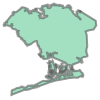

In [97]:
boroughs_shapes[0]

In [107]:
for i in borough_bounds.index:
    borough_bounds.loc[i,'area_degsq'] = borough_shapes[i].area

In [117]:
borough_bounds.rename(columns = {'boroname': 'borough'}, inplace = True)

In [127]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003389
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003221
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936


In [302]:
parks = pd.read_csv('data/parks.csv')

In [303]:
parks['borough'].value_counts()

BROOKLYN         614
QUEENS           477
BRONX            393
MANHATTAN        386
STATEN ISLAND    160
Name: borough, dtype: int64

In [304]:
borough_bounds['tot_park_area_degsq'] = 0

In [305]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    area = shape.area
    borough_bounds.loc[(borough_bounds['borough'] == parks.loc[i, 'borough']), 'tot_park_area_degsq'] = borough_bounds.loc[borough_bounds['borough'] == parks.loc[i, 'borough'], 'tot_park_area_degsq']+area
    

In [308]:
borough_bounds['tot_park_perim_deg'] = 0

In [309]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    perimeter = shape.length
    borough_bounds.loc[(borough_bounds['borough'] == parks.loc[i, 'borough']), 'tot_park_perim_deg'] = borough_bounds.loc[borough_bounds['borough'] == parks.loc[i, 'borough'], 'tot_park_perim_deg']+area
    

In [310]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [316]:
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq
BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130
QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044
BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779
MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309


In [189]:
nyc_park_area

0.012582801881291836

In [190]:
borough_bounds.loc[0, 'tot_park_area_degsq']/nyc_park_area

0.2678346631417552

In [313]:
borough_bounds['area_degsq']

0    0.030098
1    0.019130
2    0.016044
3    0.006309
4    0.011779
Name: area_degsq, dtype: float64

In [314]:
boroughs['area_degsq'] = 0

boroughs['city_park_area_degsq_percent'] = 0
boroughs['city_park_perim_deg_percent'] = 0

# ** HERE ** 

In [315]:
nyc_park_area = borough_bounds['tot_park_area_degsq'].sum()
nyc_park_perim = borough_bounds['tot_park_perim_deg'].sum()

for i in borough_bounds.index:
    index_borough = borough_bounds.loc[i, 'borough']
    boroughs.loc[index_borough,'city_park_area_degsq_percent'] = borough_bounds.loc[i, 'tot_park_area_degsq']/nyc_park_area

for i in borough_bounds.index:
    index_borough = borough_bounds.loc[i, 'borough']
    boroughs.loc[index_borough, 'city_park_perim_deg_percent'] = borough_bounds.loc[i, 'tot_park_perim_deg']/nyc_park_perim
    
for i in borough_bounds.index:
    index_borough = borough_bounds.loc[i, 'borough']
    boroughs.loc[index_borough, 'area_degsq'] = borough_bounds.loc[i, 'area_degsq']

Note: the perimeter method doesn't account for parks on waterfront where it's not possible to build near that side.

In [343]:
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent
BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491
QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463
BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298
MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685


In [324]:
boroughs['closest_park_rank'] = 0
boroughs['city_park_area_rank'] = 0
boroughs['city_park_perim_rank']= 0
boroughs['area_rank']= 0

In [342]:
boroughs['city_area_percent'] = boroughs['area_degsq']/borough_bounds['area_degsq'].sum()

In [325]:
def find_rank(dataframe, input_column, output_column, reverse = True):
    sorted_list = sorted(dataframe[input_column].to_list(), reverse = reverse)
    for i in range(len(sorted_list)):
        print(i)
        value = sorted_list[i]
        dataframe.loc[(dataframe[input_column] == value), output_column]= int(i+1)

In [328]:
find_rank(boroughs, 'closest_park_mean', 'closest_park_rank', reverse = False)

0
1
2
3
4


In [329]:
find_rank(boroughs, 'city_park_area_degsq_percent', 'city_park_area_rank')

0
1
2
3
4


In [330]:
find_rank(boroughs, 'city_park_perim_deg_percent', 'city_park_perim_rank')

0
1
2
3
4


In [331]:
find_rank(boroughs, 'area_degsq', 'area_rank')

0
1
2
3
4


In [332]:
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank
BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2
QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3
BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4
MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5


In [335]:
park_ranks = boroughs[['closest_park_rank', 'city_park_area_rank', 'city_park_perim_rank', 'area_rank']]

In [336]:
park_ranks.reset_index(inplace = True)

In [337]:
park_ranks.rename(columns = {'index':'Borough','closest_park_rank': 'Mean Closest Park Rank', 'city_park_area_rank': 'Park Area Rank', 'city_park_perim_rank': 'Park Perimeter Rank', 'area_rank': 'Area'}, inplace = True)


/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/420185623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_ranks.rename(columns = {'index':'Borough','closest_park_rank': 'Mean Closest Park Rank', 'city_park_area_rank': 'Park Area Rank', 'city_park_perim_rank': 'Park Perimeter Rank', 'area_rank': 'Area'}, inplace = True)


[This article](https://myprogrammingtutorial.com/python-capitalize-first-letter/) reminded me of the `.title()` method.

In [338]:
park_ranks['Borough'] = park_ranks['Borough'].str.title()

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/2310210876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_ranks['Borough'] = park_ranks['Borough'].str.title()


In [339]:
park_ranks.sort_values(by = 'Mean Closest Park Rank', inplace = True)

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/462276307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  park_ranks.sort_values(by = 'Mean Closest Park Rank', inplace = True)


In [340]:
park_ranks

,Borough,Mean Closest Park Rank,Park Area Rank,Park Perimeter Rank,Area
4,Manhattan,1,5,4,5
3,Bronx,2,3,3,4
0,Brooklyn,3,4,1,2
2,Staten Island,4,2,5,3
1,Queens,5,1,2,1


[This stackoverflow answer](https://stackoverflow.com/a/39358722/5394724) provided the code to output this table as an image.

In [251]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

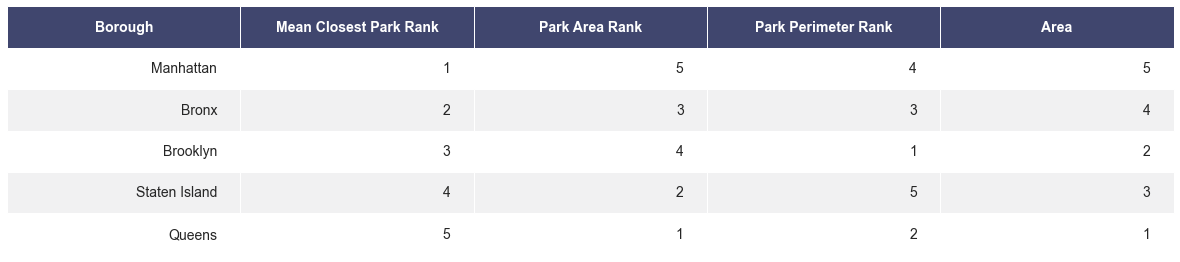

In [341]:
render_mpl_table(park_ranks, col_width=3.3)
plt.tight_layout()
plt.savefig('images/borough_parks_rank.png', dpi=300);

rank the boroughs by closest park and the percentages and look at parks within tenth/half mile.

also look at total perimeter is probably actually more useful for predicting which borough should have the most near parks. Wouldn't account for water, but...

In [345]:
park_ranks.set_index('Borough',drop = True)

,Mean Closest Park Rank,Park Area Rank,Park Perimeter Rank,Area
Borough,,,,
Manhattan,1,5,4,5
Bronx,2,3,3,4
Brooklyn,3,4,1,2
Staten Island,4,2,5,3
Queens,5,1,2,1


In [347]:
park_ranks.to_csv('data/park_ranks_data.csv', index = False)

In [ ]:
plt.plot()

compare area rank to permit rank

# Generating Random Points to See what We'd Expect For Closest Park

In [12]:
#shape = shapely.wkt.loads(boroughs_shapes[0])
minx, miny, maxx, maxy = boroughs_shapes[0].bounds

In [351]:
borough_bounds.head()

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [358]:
random_points = []
for i in range(5):
    count = 0
    while count <1000:
        xmin, ymin, xmax, ymax = boroughs_shapes[i].bounds
        name = borough_bounds['borough'][i].upper()
        x = random.uniform(xmin, xmax)
        y = random.uniform(ymin, ymax)
        if Point(x, y).within(boroughs_shapes[i]):
            count +=1
            item = [name, x, y]
            random_points.append(item)

In [359]:
random_points = pd.DataFrame(random_points, columns = ['borough', 'longitude', 'latitude'])

In [360]:
random_points.shape

(5000, 3)

In [362]:
random_points['point'] = ''

In [368]:
random_points['in_park'] = 0

In [369]:
random_points.head()

,borough,longitude,latitude,point,in_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0


In [366]:
for i in random_points.index:
    random_points.loc[i, 'point'] = shapely.geometry.Point(random_points.loc[i, 'longitude'], random_points.loc[i, 'latitude'])

/Users/lorendunn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


In [361]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [374]:
parks.dtypes

address         object
borough         object
name311         object
objectid         int64
zipcode         object
multipolygon    object
dtype: object

In [377]:
t0 = time.time()

for i in range(len(parks)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(parks.loc[i,'multipolygon'])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_park'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_park'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.09952282905578613
Time to run the 0 loop: 0.09837794303894043

1
Time from start to end of 1 loop: 0.1645679473876953
Time to run the 1 loop: 0.06498408317565918

2
Time from start to end of 2 loop: 0.23289084434509277
Time to run the 2 loop: 0.06835198402404785

3
Time from start to end of 3 loop: 0.2997169494628906
Time to run the 3 loop: 0.06676006317138672

4
Time from start to end of 4 loop: 0.365217924118042
Time to run the 4 loop: 0.06544804573059082

5
Time from start to end of 5 loop: 0.43161892890930176
Time to run the 5 loop: 0.06638097763061523

6
Time from start to end of 6 loop: 0.49751782417297363
Time to run the 6 loop: 0.06593585014343262

7
Time from start to end of 7 loop: 0.562255859375
Time to run the 7 loop: 0.0646510124206543

8
Time from start to end of 8 loop: 0.6292550563812256
Time to run the 8 loop: 0.06696796417236328

9
Time from start to end of 9 loop: 0.6946818828582764
Time to run the 9 loop: 0.06534004211425781

10

In [382]:
# I saved the random points I used for my analysis at this point, before eliminating any of them, in order to ease reproducing my analysis.
# random_points.to_csv('data/analysis_fivek_random_points.csv', index = False)

In [387]:
random_points['in_park'].value_counts()

0    4253
1     747
Name: in_park, dtype: int64

Parks make up 15.1% of the area of the city. 14.9% of my random points fell into parks. That represent a difference of 1.0%.

In [384]:
percent_parks_random = random_points['in_park'].value_counts(normalize = True)[1]
percent_parks_random

0.1494

In [385]:
percent_parks_city = borough_bounds['tot_park_area_degsq'].sum()/borough_bounds['area_degsq'].sum()
percent_parks_city

0.15094590140511652

In [386]:
(percent_parks_random - percent_parks_city)/percent_parks_city

-0.010241426833892899

In [388]:
random_points.shape

(5000, 5)

In [390]:
random_points = random_points[random_points['in_park']==0]

In [391]:
random_points.shape

(4253, 5)

In [392]:
parks_shapes = shape_list(parks['multipolygon'])

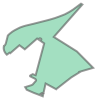

In [393]:
parks_shapes[0]

Again, using this distance estimator of 54.5.

In [395]:
t0 = time.time()

for i in random_points.index:
    t1 = time.time()
    print(f'Permit {i} started.')
    point = random_points.loc[i, 'point']
    close_park = 99999
    for n in range(0, len(parks_shapes)):
        distance = point.distance(parks_shapes[n])*54.5
        if distance < close_park:
            close_park = distance
    random_points.loc[i, 'closest_park'] = close_park
    print(f"Point {i} finished at {time.time()}, after {time.time()-t1}, {time.time()-t0} since the start of index {i}.")
print(f'Time to complete code: {time.time()-t0}') 

Permit 0 started.
Point 0 finished at 1660417353.234134, after 0.08000683784484863, 0.08084893226623535 since the start of index 0.
Permit 1 started.
Point 1 finished at 1660417353.247264, after 0.013093233108520508, 0.09397411346435547 since the start of index 1.
Permit 2 started.
Point 2 finished at 1660417353.257987, after 0.010668039321899414, 0.10469508171081543 since the start of index 2.
Permit 3 started.
Point 3 finished at 1660417353.267369, after 0.009350776672363281, 0.11407804489135742 since the start of index 3.
Permit 4 started.
Point 4 finished at 1660417353.276439, after 0.009033203125, 0.12314796447753906 since the start of index 4.
Permit 5 started.
Point 5 finished at 1660417353.285544, after 0.009053945541381836, 0.13225197792053223 since the start of index 5.
Permit 6 started.
Point 6 finished at 1660417353.294431, after 0.008848190307617188, 0.14113998413085938 since the start of index 6.
Permit 7 started.
Point 7 finished at 1660417353.303175, after 0.00871086120

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/2715717279.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_points.loc[i, 'closest_park'] = close_park


Point 15 finished at 1660417353.364733, after 0.009495019912719727, 0.21144390106201172 since the start of index 15.
Permit 16 started.
Point 16 finished at 1660417353.374114, after 0.00931096076965332, 0.22082304954528809 since the start of index 16.
Permit 17 started.
Point 17 finished at 1660417353.383345, after 0.009189844131469727, 0.2300560474395752 since the start of index 17.
Permit 18 started.
Point 18 finished at 1660417353.392398, after 0.008973836898803711, 0.2391068935394287 since the start of index 18.
Permit 20 started.
Point 20 finished at 1660417353.401132, after 0.008683919906616211, 0.24783992767333984 since the start of index 20.
Permit 21 started.
Point 21 finished at 1660417353.409887, after 0.008720874786376953, 0.2565948963165283 since the start of index 21.
Permit 22 started.
Point 22 finished at 1660417353.418556, after 0.00863790512084961, 0.26526379585266113 since the start of index 22.
Permit 23 started.
Point 23 finished at 1660417353.42734, after 0.008754

In [396]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029


# Distance from Parks
The mean distance from the closest park is about the same for the random parks as it is among the permits, both on a citywide and a borough level. The permits are slightly closer to parks, on the whole, on both scales.

In [397]:
random_points['closest_park'].mean()

0.15871838413245623

In [418]:
permits['closest_park'].mean()

0.1523573087510188

In [422]:
random_points.groupby('borough')['closest_park'].mean()

borough
BRONX            0.128274
BROOKLYN         0.164546
MANHATTAN        0.093065
QUEENS           0.236653
STATEN ISLAND    0.162689
Name: closest_park, dtype: float64

In [423]:
permits.groupby('borough')['closest_park'].mean()

borough
BRONX            0.102130
BROOKLYN         0.115663
MANHATTAN        0.076853
QUEENS           0.216910
STATEN ISLAND    0.154760
Name: closest_park, dtype: float64

In [417]:
boroughs

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent
BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491
QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463
BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298
MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685


# Historic Districts
I've opted to use the same approach to check historic districts because if I work on total area, I'll wind up with parks included. This takes that out.

Not surprisingly, the rate of building in historic districts is lower than would be expected from randomly picking points.

In [431]:
random_points['in_hist_dist'] = 0

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/3902917073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  random_points['in_hist_dist'] = 0


In [424]:
historic_dists = pd.read_csv('../historic_districts/LPC_HD_OpenData_2015Nov.csv')

In [425]:
historic_dists.columns

Index(['the_geom', 'BOROUGH', 'LP_NUMBER', 'CURRENT_', 'AREA_NAME',
       'EXTENSION', 'STATUS_OF_', 'LAST_ACTIO', 'BOUNDARY_N', 'PUBLIC_HEA',
       'OTHER_HEAR', 'DESDATE', 'CALDATE', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

In [426]:
historic_dists.columns = historic_dists.columns.str.lower()

In [427]:
historic_dists.head()

,the_geom,borough,lp_number,current_,area_name,extension,status_of_,last_actio,boundary_n,public_hea,other_hear,desdate,caldate,shape_leng,shape_area
0,MULTIPOLYGON (((-73.78070476564865 40.79368791...,QN,LP-02040,Yes,Fort Totten Historic District,No,DESIGNATED,DESIGNATED,NaN,5/4/1999,NaN,6/29/1999,4/13/1999,11203.199722,4.067523e+06
1,MULTIPOLYGON (((-73.9545180987722 40.781621828...,MN,LP-01985,Yes,Hardenbergh/Rhinelander Historic District,No,DESIGNATED,DESIGNATED,NaN,3/10/1998,NaN,5/5/1998,NaN,410.860307,1.065242e+04
2,MULTIPOLYGON (((-74.00855983447059 40.71123470...,MN,LP-01901,Yes,African Burial Ground & The Commons Historic D...,No,DESIGNATED,DESIGNATED,NaN,9/1/1992,NaN,2/25/1993,NaN,4995.471462,1.069203e+06
3,MULTIPOLYGON (((-73.9595480661095 40.648261608...,BK,LP-00989,Yes,Albemarle-Kenmore Terraces Historic District,No,DESIGNATED,DESIGNATED,NaN,1/10/1978,NaN,7/11/1978,NaN,1240.770438,7.854686e+04
4,MULTIPOLYGON (((-73.96103396183 40.65868182663...,BK,LP-02567,Yes,Chester Court Historic District,No,DESIGNATED,DESIGNATED,AS IDENTIFIED BY RESEARCH DEPARTMENT (AND DETE...,11/25/2014,NaN,12/16/2014,10/28/2014,803.900855,3.840307e+04


In [433]:
t0 = time.time()

for i in range(len(historic_dists)):
    print(i)
    t1 = time.time()
    shape = shapely.wkt.loads(historic_dists['the_geom'][i])
    minx, miny, maxx, maxy = shape.bounds
    bounding_box = shapely.geometry.box(minx, miny, maxx, maxy)
    for n in random_points.index:
        if random_points.loc[n, 'in_hist_dist'] == 0:
            point = random_points.loc[n, 'point']
            if bounding_box.contains(point):
                if shape.contains(point):
                    random_points.loc[n, 'in_hist_dist'] = 1
    print(f"Time from start to end of {i} loop: {time.time()-t0}")
    print(f"Time to run the {i} loop: {time.time()-t1}")
    print('')
print(f"Total time: {time.time()-t0}")

0
Time from start to end of 0 loop: 0.09538602828979492
Time to run the 0 loop: 0.08913612365722656

1
Time from start to end of 1 loop: 0.15565085411071777
Time to run the 1 loop: 0.06019401550292969

2
Time from start to end of 2 loop: 0.21610403060913086
Time to run the 2 loop: 0.060610055923461914

3
Time from start to end of 3 loop: 0.27866482734680176
Time to run the 3 loop: 0.062367916107177734

4
Time from start to end of 4 loop: 0.33881688117980957
Time to run the 4 loop: 0.06010913848876953

5
Time from start to end of 5 loop: 0.40186476707458496
Time to run the 5 loop: 0.06305599212646484

6
Time from start to end of 6 loop: 0.4645669460296631
Time to run the 6 loop: 0.06273889541625977

7
Time from start to end of 7 loop: 0.5269279479980469
Time to run the 7 loop: 0.0622410774230957

8
Time from start to end of 8 loop: 0.5900530815124512
Time to run the 8 loop: 0.06313490867614746

9
Time from start to end of 9 loop: 0.653256893157959
Time to run the 9 loop: 0.0631747245788

In [434]:
random_points.head()

,borough,longitude,latitude,point,in_park,closest_park,in_hist_dist
0,QUEENS,-73.854893,40.782480,POINT (-73.85489261102316 40.78248031228739),0,0.181282,0
1,QUEENS,-73.893860,40.755288,POINT (-73.89386045158598 40.75528778868644),0,0.224269,0
2,QUEENS,-73.817751,40.719254,POINT (-73.81775077819175 40.71925356635326),0,0.140586,0
3,QUEENS,-73.824702,40.771634,POINT (-73.82470248869488 40.77163421976302),0,0.123754,0
4,QUEENS,-73.863832,40.773887,POINT (-73.86383157649665 40.77388735309459),0,0.329029,0


In [435]:
random_points['in_hist_dist'].value_counts(normalize = True)

0    0.961439
1    0.038561
Name: in_hist_dist, dtype: float64

In [436]:
permits['in_hist_dist'].value_counts(normalize = True)

0    0.994148
1    0.005852
Name: in_hist_dist, dtype: float64

In [441]:
random_points.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX            0.012920
BROOKLYN         0.040043
MANHATTAN        0.118203
QUEENS           0.009945
STATEN ISLAND    0.009950
Name: in_hist_dist, dtype: float64

In [444]:
permits.groupby('borough')['in_hist_dist'].value_counts(normalize = True)[:, 1]

borough
BRONX        0.001368
BROOKLYN     0.009107
MANHATTAN    0.053571
QUEENS       0.002893
Name: in_hist_dist, dtype: float64

What percentage of Manhattan is historic district? Brooklyn? How does this affect building housing?

Based on area (minus parks, what would we expect in each district)?

In [445]:
boroughs.head()

,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent
BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491
QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062
STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463
BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298
MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685


In [446]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [447]:
borough_bounds.head()

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [454]:
boroughs.reset_index(inplace=True)

In [459]:
boroughs.rename(columns = {'index': 'borough'}, inplace = True)

In [460]:
boroughs

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,NaN


In [462]:
borough_bounds.loc[(borough_bounds['borough']== 'MANHATTAN'), 'tot_park_area_degsq']

3    0.001212
Name: tot_park_area_degsq, dtype: float64

In [469]:
boroughs.loc[0, 'area_degsq']

0.019130333943754674

In [470]:
0.019130333943754674-.001212

0.017918333943754673

In [468]:
boroughs.loc[0, 'area_degsq']-borough_bounds.loc[(borough_bounds['borough']== 'MANHATTAN'), 'tot_park_area_degsq']

3    0.017918
Name: tot_park_area_degsq, dtype: float64

In [467]:
boroughs.loc[i, 'area_minus_parks_degsq']

0

In [464]:
boroughs['area_minus_parks_degsq'] = 0

In [493]:
borough_bounds[borough_bounds['borough'] == 'MANHATTAN'].index

Int64Index([3], dtype='int64')

In [ ]:
borough_bounds.loc

In [492]:
borough_bounds.loc[(borough_bounds[borough_bounds['borough'] == 'MANHATTAN'].index), 'tot_park_area_degsq']

0.0012120541090715222

In [496]:
borough_bounds.loc[3, 'tot_park_area_degsq']

0.0012120541090715222

In [508]:
borough

'MANHATTAN'

In [530]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,NaN


In [548]:
boroughs['tot_park_area_degsq'] = 0

In [555]:
for i in parks.index:
    shape = shapely.wkt.loads(parks.loc[i, 'multipolygon'])
    area = shape.area
    boroughs.loc[(boroughs['borough'] == parks.loc[i, 'borough']), 'tot_park_area_degsq'] = boroughs.loc[boroughs['borough'] == parks.loc[i, 'borough'], 'tot_park_area_degsq']+area


Something is wrong because it's saying the bronx is almost entirely park.

In [575]:
parks.head()

,address,borough,name311,objectid,zipcode,multipolygon
0,132 ALTAMONT STREET,STATEN ISLAND,High Rock Park,69247,1030410306,MULTIPOLYGON (((-74.12362180687407 40.58475747...
1,2539 PITKIN AVENUE,BROOKLYN,Manley's Pl,5274,11208,MULTIPOLYGON (((-73.87857041022092 40.67475246...
2,none,QUEENS,Park,6413,11414,MULTIPOLYGON (((-73.8471858043584 40.669606352...
3,225 JORALEMON STREET,BROOKLYN,Columbus Park,5062,11201,MULTIPOLYGON (((-73.98911885717008 40.69492270...
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...


In [576]:
parks[parks['borough']== 'BRONX']

,address,borough,name311,objectid,zipcode,multipolygon
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...
10,none,BRONX,Soundview Park,6210,10473,MULTIPOLYGON (((-73.86982410310259 40.81679170...
11,750 COURTLANDT AVENUE,BRONX,P.S. 29 Ballfield,6428,10451,MULTIPOLYGON (((-73.91665189609022 40.82143889...
14,none,BRONX,Whalen Grove,5669,10457,MULTIPOLYGON (((-73.88586966839269 40.85094610...
15,765 MANIDA STREET,BRONX,Julio Carballo Fields,5311,10474,MULTIPOLYGON (((-73.8890124322292 40.816439899...
...,...,...,...,...,...,...
1999,902 CAULDWELL AVENUE,BRONX,Dunbar Playground,5727,10456,MULTIPOLYGON (((-73.9059191265952 40.823253724...
2003,1750 BURKE AVENUE,BRONX,Haffen Park,4705,10469,MULTIPOLYGON (((-73.83763290069393 40.87331371...
2007,none,BRONX,Matthews Muliner Playground,5538,10462,MULTIPOLYGON (((-73.86105361973188 40.84673077...
2014,2700 BAILEY AVENUE,BRONX,Riverbend Playground,6663,1046310468,MULTIPOLYGON (((-73.90524044430829 40.87240952...


In [584]:
bronx_parks = parks[parks['borough']== 'BRONX']

In [585]:
bronx_parks['area'] = 0

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/1809847592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_parks['area'] = 0


In [588]:
bronx_parks.head()

,address,borough,name311,objectid,zipcode,multipolygon,area
4,400 EAST 188 STREET,BRONX,Webster Playground,4764,10458,MULTIPOLYGON (((-73.89239779472493 40.85937697...,3.457754e-07
10,none,BRONX,Soundview Park,6210,10473,MULTIPOLYGON (((-73.86982410310259 40.81679170...,1.161808e-04
11,750 COURTLANDT AVENUE,BRONX,P.S. 29 Ballfield,6428,10451,MULTIPOLYGON (((-73.91665189609022 40.82143889...,4.782550e-07
14,none,BRONX,Whalen Grove,5669,10457,MULTIPOLYGON (((-73.88586966839269 40.85094610...,5.278414e-08
15,765 MANIDA STREET,BRONX,Julio Carballo Fields,5311,10474,MULTIPOLYGON (((-73.8890124322292 40.816439899...,1.449964e-06


In [587]:
for i in bronx_parks.index:
    shape = shapely.wkt.loads(bronx_parks.loc[i, 'multipolygon'])
    area = shape.area
    bronx_parks.loc[i, 'area'] = area

/var/folders/5_/498w081d1837cc82dmb4hwmc0000gn/T/ipykernel_1125/7126890.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bronx_parks.loc[i, 'area'] = area


In [589]:
bronx_parks['area'].sum()

0.002935890095524689

In [ ]:
THE BRONX VALUE IN THE BOROUGHS TABLE IS MESSED UP.

# PRetty sure the belwo is bad, though maybe soe notes

In [572]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq,tot_park_area_degsq,area_minus_parks_percent
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,0.011753,0.007378,0.355836
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,0.016618,0.013480,0.503129
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,0.003162,0.012881,0.095745
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,0.000035,0.011744,0.001060
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,0.001461,0.004848,0.044230


In [558]:
boroughs['area_minus_parks_degsq'] = 0

In [560]:
boroughs['area_minus_parks_degsq'] = boroughs['area_degsq']-boroughs['tot_park_area_degsq']

In [566]:
boroughs['area_minus_parks_percent'] = 0

In [568]:
city_nonpark_area = boroughs['area_minus_parks_degsq'].sum()
city_nonpark_area

0.033028471433729625

In [571]:
for i in boroughs.index:
    boroughs.loc[i, 'area_minus_parks_percent'] = boroughs.loc[i, 'area_minus_parks_degsq']/city_nonpark_area

In [573]:
permits['borough'].value_counts(normalize = True)

BROOKLYN         0.305977
QUEENS           0.288979
STATEN ISLAND    0.264177
BRONX            0.101853
MANHATTAN        0.039014
Name: borough, dtype: float64

In [574]:
boroughs[['borough', 'area_minus_parks_percent']]

,borough,area_minus_parks_percent
0,BROOKLYN,0.355836
1,QUEENS,0.503129
2,STATEN ISLAND,0.095745
3,BRONX,0.001060
4,MANHATTAN,0.044230


In [543]:
boroughs

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq,tot_park_area_degsq,area_minus_parks_percent
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,0,0.001844,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,0,0.003370,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,0,0.003220,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,0,0.002936,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,0,0.001212,NaN


In [511]:
borough_bounds

,the_geom,borocode,borough,shape_leng,shape_area,area_degsq,tot_park_area_degsq,tot_park_perim_deg
0,MULTIPOLYGON (((-73.82644661516991 40.59052744...,4,QUEENS,900269.280485,3.040206e+09,0.030098,0.003370,0.009018
1,MULTIPOLYGON (((-73.86327471071958 40.58387684...,3,BROOKLYN,728477.954082,1.934167e+09,0.019130,0.001844,0.011607
2,MULTIPOLYGON (((-74.05050806403247 40.56642203...,5,STATEN ISLAND,325924.002076,1.623631e+09,0.016044,0.003220,0.003025
3,MULTIPOLYGON (((-74.01092841268031 40.68449147...,1,MANHATTAN,359993.126318,6.366208e+08,0.006309,0.001212,0.007297
4,MULTIPOLYGON (((-73.89680883223778 40.79580844...,2,BRONX,463868.599917,1.187194e+09,0.011779,0.002936,0.007430


In [520]:
 borough_bounds.loc[borough_bounds.loc[borough_bounds['borough'] == 'MANHATTAN'].index, 'the_geom']

3    MULTIPOLYGON (((-74.01092841268031 40.68449147...
Name: the_geom, dtype: object

In [ ]:
borough_bounds['burough'] == index_borough

In [529]:
borough_bounds.loc[0, 'borocode']

4

In [526]:
borough_bounds.dtypes

the_geom                object
borocode                 int64
borough                 object
shape_leng             float64
shape_area             float64
area_degsq             float64
tot_park_area_degsq    float64
tot_park_perim_deg     float64
dtype: object

In [525]:
for i in boroughs.index:
    index_borough = boroughs.loc[i, 'borough']
    print(index_borough)
    parks_area = borough_bounds[borough_bounds['borough'] == index_borough]['tot_park_area_degsq']
    print('Parks_area', parks_area)

BROOKLYN
Parks_area 1    0.001844
Name: tot_park_area_degsq, dtype: float64
QUEENS
Parks_area 0    0.00337
Name: tot_park_area_degsq, dtype: float64
STATEN ISLAND
Parks_area 2    0.00322
Name: tot_park_area_degsq, dtype: float64
BRONX
Parks_area 4    0.002936
Name: tot_park_area_degsq, dtype: float64
MANHATTAN
Parks_area 3    0.001212
Name: tot_park_area_degsq, dtype: float64


In [518]:
for i in boroughs.index:
    index_borough = boroughs.loc[i, 'borough']
    boro_area = boroughs.loc[i, 'area_degsq']
    index = borough_bounds.loc[borough_bounds['borough'] == index_borough].index
    print('Index is:', index)
    boro_parks = borough_bounds.loc[borough_bounds['borough'] == index_borough, 'tot_park_area_degsq']
    print(boro_area)
    print(boro_parks)
    boro_less_parks = boro_area - boro_parks
    print(type(boro_less_parks))
    boroughs.loc[i, 'area_minus_parks_degsq'] = boro_less_parks
    boro_area - boro_parks

Index is: Int64Index([1], dtype='int64')
0.019130333943754674
1    0.001844
Name: tot_park_area_degsq, dtype: float64
<class 'pandas.core.series.Series'>


ValueError: Incompatible indexer with Series

In [504]:
boroughs.head()

,borough,percent_of_tot,high_complaints_percent,complaints_percent_diff,closest_park_mean,city_park_area_degsq_percent,city_park_perim_deg_percent,closest_park_rank,city_park_area_rank,city_park_perim_rank,area_degsq,area_rank,city_area_percent,area_minus_parks_degsq
0,BROOKLYN,0.305977,0.277778,-0.092163,0.115663,0.146581,0.302463,3,4,1,0.019130,2,0.229491,NaN
1,QUEENS,0.288979,0.072650,-0.748599,0.216910,0.267835,0.234975,5,1,2,0.030098,1,0.361062,NaN
2,STATEN ISLAND,0.264177,0.021368,-0.919117,0.154760,0.255932,0.078818,4,2,5,0.016044,3,0.192463,NaN
3,BRONX,0.101853,0.318376,2.125835,0.102130,0.233326,0.193596,2,3,3,0.011779,4,0.141298,NaN
4,MANHATTAN,0.039014,0.309829,6.941583,0.076853,0.096326,0.190148,1,5,4,0.006309,5,0.075685,NaN


I have precinct data in the original permits database (99%) and can match on job_no